# 1- Understanding Project Data

##This projects contains two dataframes:
1. Energy Consumption.csv:

This dataset contains energy consumption data collected from network sites, to help us monitor and
track sites’ energy consumption, the dataset has 5 columns:

    • DateTime
    • Site_id: unique site identifier contains more than one cell.
    • Cell_id: unique cell identifier.
    • Region: geographical area that identifies site location.
    • KWH/hh (per half hour): Energy consumed in half hour intervals.



2. Power Demand.excel:

This dataset contains energy consumption demand every half hour interval, the dataset has 2 columns: DemandDateTime	and Demand

    Demand prices for calculating cost:
      • High (77.21p/kWh)
      • Normal (19.46p/kWh)
      • Low (6.89p/kWh)

#2- Importing and Cleaning Dataframes

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# importing dataframes
df1= pd.read_csv('/content/drive/MyDrive/Carerha/Data/Final Project/Sites Energy Consumption Part_001.csv')
df2= pd.read_csv('/content/drive/MyDrive/Carerha/Data/Final Project/Sites Energy Consumption Part_002.csv')
df3= pd.read_csv('/content/drive/MyDrive/Carerha/Data/Final Project/Sites Energy Consumption Part_003.csv')

frames = [df1, df2, df3]
df_consum = pd.concat(frames)
df_consum

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A
...,...,...,...,...,...
450962,MAC000100,"18:30:00 13,20,12",0.260,N,B
450963,MAC000100,"19:00:00 13,20,12",0.267,N,B
450964,MAC000100,"19:30:00 13,20,12",0.274,N,B
450965,MAC000100,"20:00:00 13,20,12",0.312,N,B


In [3]:
#Checking for null values and data types
df_consum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380252 entries, 0 to 450966
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cell_id                  1380252 non-null  object 
 1   DateTime                 1380252 non-null  object 
 2   KWH/hh (per half hour)   1380252 non-null  float64
 3   site_id                  1380252 non-null  object 
 4   region                   1380252 non-null  object 
dtypes: float64(1), object(4)
memory usage: 63.2+ MB


In [4]:
#dropping duplicates

df_consum.duplicated().sum()
df_consum.drop_duplicates(inplace=True)
df_consum.shape

(1379310, 5)

In [5]:
df_consum.isnull().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0


In [6]:
# changing type to date time
df_consum['DateTime'] = pd.to_datetime(df_consum['DateTime'], format='%H:%M:%S %y,%d,%m')
df_consum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1379310 entries, 0 to 450966
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1379310 non-null  object        
 1   DateTime                 1379310 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1379310 non-null  float64       
 3   site_id                  1379310 non-null  object        
 4   region                   1379310 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 63.1+ MB


In [7]:
df_consum

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A
...,...,...,...,...,...
450962,MAC000100,2013-12-20 18:30:00,0.260,N,B
450963,MAC000100,2013-12-20 19:00:00,0.267,N,B
450964,MAC000100,2013-12-20 19:30:00,0.274,N,B
450965,MAC000100,2013-12-20 20:00:00,0.312,N,B


In [8]:
df_consum.rename(columns={'KWH/hh (per half hour) ':'KWH/hh'}, inplace=True)
df_consum['Time']=df_consum['DateTime'].dt.time
df_consum['Date']=df_consum['DateTime'].dt.date

In [9]:
(df_consum['KWH/hh']== 0 ).sum()

46737

In [10]:
df_demand =pd.read_excel("/content/drive/MyDrive/Carerha/Data/Final Project/Demand.xlsx")
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


In [11]:
df_demand

,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
...,...,...
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal


In [12]:
#merging the two tables together
df = pd.merge(df_consum, df_demand, left_on='DateTime', right_on='DemandDateTime')
df.drop('DemandDateTime', axis=1, inplace=True)
df.head()

,cell_id,DateTime,KWH/hh,site_id,region,Time,Date,Demand
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,00:00:00,2013-01-01,Normal
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,00:30:00,2013-01-01,Normal
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,01:00:00,2013-01-01,Normal
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,01:30:00,2013-01-01,Normal
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,02:00:00,2013-01-01,Normal


In [13]:
df.isnull().sum()

,0
cell_id,0
DateTime,0
KWH/hh,0
site_id,0
region,0
Time,0
Date,0
Demand,0


In [14]:
#checking unique values
for i in ['cell_id','region','site_id','Demand']:
  print( df[i].unique())


['MAC000002' 'MAC000003' 'MAC000004' 'MAC000006' 'MAC000007' 'MAC000008'
 'MAC000009' 'MAC000010' 'MAC000011' 'MAC000012' 'MAC000013' 'MAC000016'
 'MAC000018' 'MAC000019' 'MAC000020' 'MAC000021' 'MAC000022' 'MAC000023'
 'MAC000024' 'MAC000025' 'MAC000026' 'MAC000027' 'MAC000028' 'MAC000029'
 'MAC000030' 'MAC000032' 'MAC000033' 'MAC000034' 'MAC000035' 'MAC000036'
 'MAC000037' 'MAC000038' 'MAC000039' 'MAC000040' 'MAC000041' 'MAC000042'
 'MAC000043' 'MAC000045' 'MAC000047' 'MAC000049' 'MAC000050' 'MAC000053'
 'MAC000054' 'MAC000055' 'MAC000056' 'MAC000057' 'MAC000058' 'MAC000059'
 'MAC000060' 'MAC000061' 'MAC000062' 'MAC000063' 'MAC000066' 'MAC000067'
 'MAC000068' 'MAC000069' 'MAC000070' 'MAC000072' 'MAC000073' 'MAC000074'
 'MAC000077' 'MAC000078' 'MAC000079' 'MAC000080' 'MAC000081' 'MAC000083'
 'MAC000084' 'MAC000085' 'MAC000086' 'MAC000087' 'MAC000089' 'MAC000090'
 'MAC000091' 'MAC000092' 'MAC000093' 'MAC000094' 'MAC000095' 'MAC000096'
 'MAC000097' 'MAC000098' 'MAC000099' 'MAC000100']
[

In [15]:
#Changing Demand mislabels
map1 ={'Normal':'Normal' ,'Low':'Low','Normall':'Normal' , 'High':'High' ,'normal':'Normal' ,'high':'High' }
df['Demand'] = df['Demand'].map(map1)


In [16]:
df['Demand'].value_counts()

,count
Demand,
Normal,1187240
Low,130166
High,61904


In [17]:
#calculating total cost

map2=   { 'High' : 77.21,  'Normal' :19.46, 'Low' :6.89}
df["Cost"] = df["Demand"].map(map2)
df['Total_Cost']=df['KWH/hh']*df['Cost']
df.sample(10)

,cell_id,DateTime,KWH/hh,site_id,region,Time,Date,Demand,Cost,Total_Cost
731248,MAC000055,2013-10-27 19:30:00,0.151,K,B,19:30:00,2013-10-27,Normal,19.46,2.93846
343403,MAC000026,2013-09-26 03:00:00,0.202,D,A,03:00:00,2013-09-26,Normal,19.46,3.93092
229744,MAC000020,2013-03-31 17:30:00,0.046,J,C,17:30:00,2013-03-31,Normal,19.46,0.89516
718623,MAC000055,2013-02-06 17:30:00,0.438,K,B,17:30:00,2013-02-06,Normal,19.46,8.52348
1378009,MAC000100,2013-11-23 18:30:00,0.330,N,B,18:30:00,2013-11-23,Normal,19.46,6.42180
1135208,MAC000085,2013-10-10 23:00:00,0.844,D,A,23:00:00,2013-10-10,Normal,19.46,16.42424
729126,MAC000055,2013-09-13 14:30:00,0.111,K,B,14:30:00,2013-09-13,Normal,19.46,2.16006
364438,MAC000027,2013-12-08 08:30:00,0.077,J,C,08:30:00,2013-12-08,Low,6.89,0.53053
164025,MAC000012,2013-07-15 13:30:00,0.000,E,A,13:30:00,2013-07-15,Normal,19.46,0.00000
715112,MAC000054,2013-11-25 14:00:00,0.153,Q,B,14:00:00,2013-11-25,Normal,19.46,2.97738


#3- Exploratory Data Analysis

### Univarient analysis


In [18]:
df['KWH/hh'].describe()
## mean > median which mean data is left skewed

,KWH/hh
count,1.379310e+06
mean,2.423348e-01
std,6.767733e+00
min,0.000000e+00
25%,6.500000e-02
50%,1.360000e-01
75%,2.650000e-01
max,7.657000e+03


In [19]:
(df['KWH/hh']==0).sum()

46737

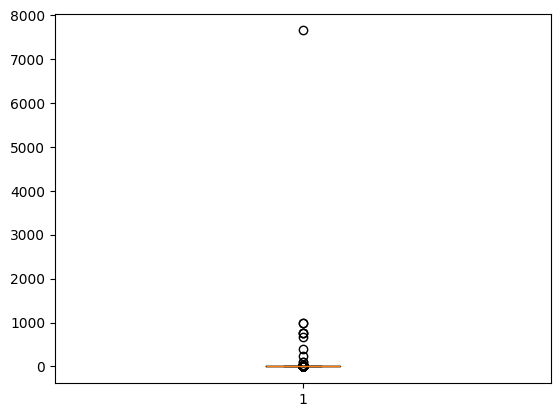

In [20]:
plt.boxplot(df['KWH/hh'])
plt.show()

In [21]:
df[df['KWH/hh']==7657]

,cell_id,DateTime,KWH/hh,site_id,region,Time,Date,Demand,Cost,Total_Cost
484909,MAC000036,2013-01-18 18:30:00,7657.0,E,A,18:30:00,2013-01-18,Normal,19.46,149005.22


In [22]:
# demand is usually normal at this time, which mean the KWH 7657 is an oultlier
df.drop(df[df['KWH/hh']==7657].index, inplace=True)

In [23]:
## IQR for finding outliers in KWH/hh
# determining upper limit by multipying IQR by 10, knowing that lower limit = 0
Q1 = df['KWH/hh'].quantile(0.25)
Q3 = df['KWH/hh'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 10*(IQR)

print( 'upper limit is:', upper)


upper limit is: 2.265


In [24]:
df = df[df['KWH/hh']<= 2.265]
df.shape

(1375082, 10)

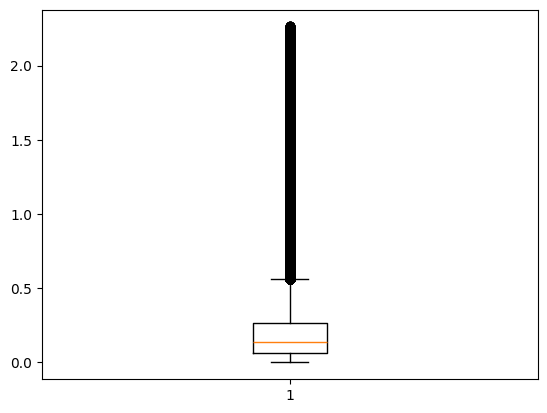

In [25]:
plt.boxplot(df['KWH/hh'])
plt.show()

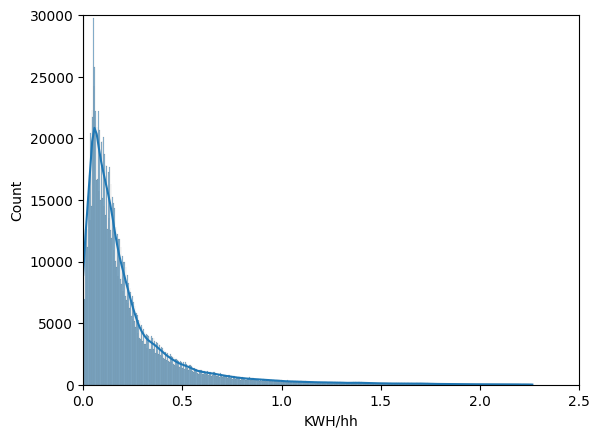

In [26]:
# analyzing consumption

sns.histplot(data =df,  x= df['KWH/hh'], kde = True)
plt.xlim(0,2.5)
plt.ylim(0,30000)

plt.show()


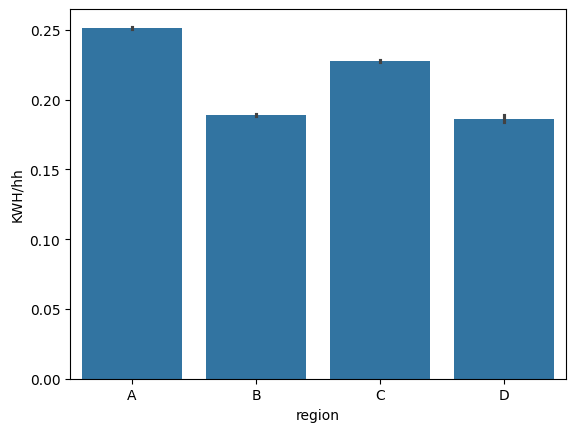

In [27]:
sns.barplot(data=df, x='region', y='KWH/hh')
plt.show()

### Feature Engineering

In [28]:
# making new category time of the day for better analysis
df['hours'] =pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour


In [29]:
bin =[-1, 5, 11, 16, 20, 23]
lab= ['Dawn','Morning', 'Afternoon', 'Evening','Night']
df['Time_of_Day'] = pd.cut(df['hours'], bins=bin, labels=lab)

In [30]:
# extracting csv after cleaning
df.to_csv('cleaned_data.csv', index=False)

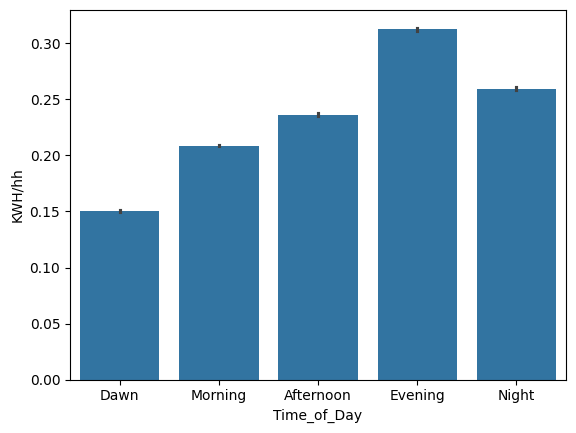

In [31]:
# analyzing affect of consumption per time of day
sns.barplot(data=df, x='Time_of_Day', y='KWH/hh')
plt.show()

In [32]:
df['KWH/hh'].groupby(df['Time_of_Day']).mean().sort_values()

<ipython-input-32-4be00802c17a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['KWH/hh'].groupby(df['Time_of_Day']).mean().sort_values()


,KWH/hh
Time_of_Day,
Dawn,0.150450
Morning,0.208881
Afternoon,0.236521
Night,0.259361
Evening,0.312800


###### From above chart and values that consumption according to time of the day is:
  - weakest at Dawn with mean of 0.15 KWH/hh
  - higest at the evening with mean of 0.31 KWH/hh

  In conclusion: the consumption differs according to time of the day



   


In [33]:
pd.pivot_table(df, index=('region'), values='KWH/hh', aggfunc='mean')

,KWH/hh
region,
A,0.251508
B,0.189047
C,0.227915
D,0.186330


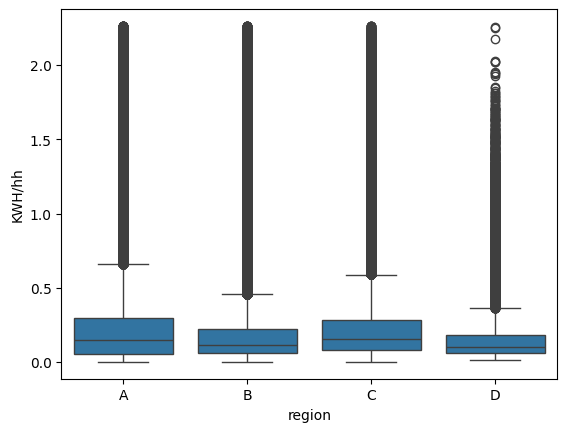

In [34]:
sns.boxplot(data=df, x='region', y='KWH/hh')
plt.show()

In [35]:
# to analyze each site maximum consumption
pd.pivot_table(df, index=('region','site_id'), values='KWH/hh', aggfunc='mean').sort_values(by ='KWH/hh')

KWH/hh
region site_id          
B      P        0.152276
       Q        0.168756
D      U        0.186330
B      K        0.188794
A      E        0.204760
C      F        0.205617
       J        0.206296
B      N        0.225495
C      H        0.237024
       G        0.246402
B      L        0.270625
A      D        0.295319
       A        0.374583
       C        0.594030

###### To answer second question which is the correlation between region and consumption:
From table and chart, there is  slight difference in consumption according to region.

#4- Hypothesis Testing

#### Keeping in mind that the data given is not normaly distrbuted which means the hypothesis testing might not be accurate

In [36]:
# hypothesis testing using ttest to test deifference according to region

import scipy.stats as stats

lowest_consumption = df[df['region'] == 'D']['KWH/hh']
highest_consumption = df[df['region'] == 'A']['KWH/hh']

t_statistic, p_value = stats.ttest_ind(lowest_consumption, highest_consumption)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.1

if p_value < alpha:
    print("There is a significant difference in energy consumption between A and D.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


T-statistic: -37.06651858877411
P-value: 2.2157167413317676e-300
There is a significant difference in energy consumption between A and D.


In [37]:
# hypothesis testing using ttest to test deifference according to time of day

lowest_consumption = df[df['Time_of_Day'] == 'Dawn']['KWH/hh']
highest_consumption = df[df['Time_of_Day'] == 'Evening']['KWH/hh']

t_statistic, p_value = stats.ttest_ind(lowest_consumption, highest_consumption)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.7

if p_value < alpha:
    print(" There is a significant difference in energy consumption between Dawn time and evening time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

T-statistic: -219.26651638313564
P-value: 0.0
 There is a significant difference in energy consumption between Dawn time and evening time.


# 5- **Threshold** Recommendation

##### First assuming threshold is the consumption below first quartile

In [57]:
Q1= df['KWH/hh'].quantile(0.25)
low_consum =df[ df['KWH/hh']<= Q1]
low_consum

,cell_id,DateTime,KWH/hh,site_id,region,Time,Date,Demand,Cost,Total_Cost,hours,Time_of_Day
2610,MAC000002,2013-02-24 09:00:00,0.065,A,A,09:00:00,2013-02-24,Normal,19.46,1.26490,9,Morning
4008,MAC000002,2013-03-25 12:00:00,0.065,A,A,12:00:00,2013-03-25,Normal,19.46,1.26490,12,Afternoon
4099,MAC000002,2013-03-27 09:30:00,0.065,A,A,09:30:00,2013-03-27,Low,6.89,0.44785,9,Morning
11888,MAC000002,2013-09-05 16:00:00,0.065,A,A,16:00:00,2013-09-05,Normal,19.46,1.26490,16,Afternoon
11942,MAC000002,2013-09-06 19:00:00,0.065,A,A,19:00:00,2013-09-06,Normal,19.46,1.26490,19,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
1379198,MAC000100,2013-12-18 13:00:00,0.061,N,B,13:00:00,2013-12-18,Normal,19.46,1.18706,13,Afternoon
1379231,MAC000100,2013-12-19 05:30:00,0.064,N,B,05:30:00,2013-12-19,Low,6.89,0.44096,5,Dawn
1379242,MAC000100,2013-12-19 11:00:00,0.060,N,B,11:00:00,2013-12-19,Low,6.89,0.41340,11,Morning
1379275,MAC000100,2013-12-20 03:30:00,0.064,N,B,03:30:00,2013-12-20,Low,6.89,0.44096,3,Dawn


In [63]:
# calculating amount of energy saved in KW
energy_saved = round((low_consum['KWH/hh'].sum()),2)
per_energy_saved = round(((low_consum['KWH/hh'].sum()))/(df['KWH/hh'].sum())*100,2)

#calculating amount of money saved in Piasters
money_saved = round(low_consum['Total_Cost'].sum(),2)
per_money_saved = round(((low_consum['Total_Cost'].sum()))/(df['Total_Cost'].sum())*100,2)

print("Energy saved =", energy_saved, "KW"
      "\nPercentage of energy saved =", per_energy_saved, "%"
      "\nMoney saved =", money_saved, "Piasters"
      "\nPercentage of money saved =", per_money_saved , "%"
      )

Energy saved = 11927.61 KW
Percentage of energy saved = 3.88 %
Money saved = 243631.14 Piasters
Percentage of money saved = 3.71 %


#####Second assuming threshold is the consumption in low demand time

In [65]:
low_demand =df[ df['Demand']== 'Low']
low_demand

,cell_id,DateTime,KWH/hh,site_id,region,Time,Date,Demand,Cost,Total_Cost,hours,Time_of_Day
172,MAC000002,2013-01-04 14:00:00,0.080,A,A,14:00:00,2013-01-04,Low,6.89,0.55120,14,Afternoon
173,MAC000002,2013-01-04 14:30:00,0.118,A,A,14:30:00,2013-01-04,Low,6.89,0.81302,14,Afternoon
174,MAC000002,2013-01-04 15:00:00,0.099,A,A,15:00:00,2013-01-04,Low,6.89,0.68211,15,Afternoon
175,MAC000002,2013-01-04 15:30:00,0.098,A,A,15:30:00,2013-01-04,Low,6.89,0.67522,15,Afternoon
176,MAC000002,2013-01-04 16:00:00,0.116,A,A,16:00:00,2013-01-04,Low,6.89,0.79924,16,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
1379273,MAC000100,2013-12-20 02:30:00,0.111,N,B,02:30:00,2013-12-20,Low,6.89,0.76479,2,Dawn
1379274,MAC000100,2013-12-20 03:00:00,0.085,N,B,03:00:00,2013-12-20,Low,6.89,0.58565,3,Dawn
1379275,MAC000100,2013-12-20 03:30:00,0.064,N,B,03:30:00,2013-12-20,Low,6.89,0.44096,3,Dawn
1379276,MAC000100,2013-12-20 04:00:00,0.065,N,B,04:00:00,2013-12-20,Low,6.89,0.44785,4,Dawn


In [66]:
# calculating amount of energy saved in KW
energy_saved = round((low_demand['KWH/hh'].sum()),2)
per_energy_saved = round(((low_demand['KWH/hh'].sum()))/(df['KWH/hh'].sum())*100,2)

#calculating amount of money saved in Piasters
money_saved = round(low_demand['Total_Cost'].sum(),2)
per_money_saved = round(((low_demand['Total_Cost'].sum()))/(df['Total_Cost'].sum())*100,2)

print("Energy saved =", energy_saved, "KW"
      "\nPercentage of energy saved =", per_energy_saved, "%"
      "\nMoney saved =", money_saved, "Piasters"
      "\nPercentage of money saved =", per_money_saved , "%"
      )

Energy saved = 28939.59 KW
Percentage of energy saved = 9.41 %
Money saved = 199393.75 Piasters
Percentage of money saved = 3.04 %


## As a result
##### Choosing to shutdown on consumption below first quartile which is (0.065 KW/hh) will save more money despite saving less energy, which is smarter decision, and it will not affect sites due to their low consumption:
  * Energy saved = 11927.61 KW
  * Percentage of energy saved = 3.88 %
  * Money saved = 243631.14 Piasters
  * Percentage of money saved = 3.71 %




